### Part 0: Import
**Import the various libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix

%matplotlib inline

### Part 1: Check Stock Symbol Input
**Check the input of the stock name**

In [2]:
# Read csvfile for all the stock symbol list of US
stock= pd.read_csv('US-Stock-Symbols.csv')
stock_symbol = list((stock['Symbol']))


def checkInput(symbol):
    '''check if the input matches the stock symbol'''
    
    symbol = symbol.upper()
    
    if symbol not in stock_symbol:
        print('Please enter the right symbol of the stock.')
        
    elif symbol in stock_symbol:
        return symbol


In [4]:
# Get 3 stock name  of the input
symbol_1 = str(input("Enter the first stock symbol: "))
symbol_2 = str(input("Enter the second stock symbol: "))
symbol_3 = str(input("Enter the thrid stock symbol: "))


stock1_name = checkInput(symbol_1)
stock2_name = checkInput(symbol_2)
stock3_name = checkInput(symbol_3)

print(stock1_name, stock2_name, stock3_name)



Enter the first stock symbol: tsla
Enter the second stock symbol: f
Enter the thrid stock symbol: gm
TSLA F GM


### Part 2: Get Stock Data
**Get the data from the stock**

In [5]:
class Stock:
    '''the information of the stock.'''
    
    def __init__(self, symbol, start_year, end_year):
        self.symbol = symbol
        self.start_year = start_year
        self.end_year = end_year

    
    def getData(self):
        '''Get data of the stock, such as Open Price, Volume'''
        
        start = datetime.datetime(self.start_year, 1, 1)
        end = datetime.datetime(self.end_year, 1, 1)
        
        stock_data = web.DataReader(self.symbol,"quandl",start, end, access_key="iGRR6CbVgp8yQRgiZ3_b")
        

        return stock_data
        
    
    def output_To_Csv(self):
        '''Out the stock data as stock_data.csv file'''
        
        start = datetime.datetime(self.start_year, 1, 1)
        end = datetime.datetime(self.end_year, 1, 1)
        
        stock_data = web.DataReader(self.symbol,"quandl",start, end, access_key="iGRR6CbVgp8yQRgiZ3_b")
        
        stock_data.to_csv('stock_data.csv')
        
        
        
        

In [6]:
# Get the data of 3 stocks
start = int(input("Enter the start year: "))
end = int(input("Enter the end year: "))

# Get the data of 3 stocks
stock1 = Stock(stock1_name, start, end).getData()
stock2 = Stock(stock2_name, start, end).getData()
stock3 = Stock(stock3_name, start, end).getData()


Enter the start year: 2012
Enter the end year: 2017


In [42]:
Stock(stock1_name, 2012, 2017).output_To_Csv()

### Part 2: Visualizing the Data
**Plot the data from the stock**

In [7]:
class Plot:
    '''Visualizing the Data'''
    
    
    def __init__(self, stock1):
        
        self.stock1 = stock1

        
    
    def plotOpen(stock1):
        '''Plot the Open Price of one stock'''
        
        stock1['Open'].plot(label = 'stock', figsize=(16,8), title='Open Price')
        plt.legend()
        
    
    
    def plotVolume(stock1):
        '''Plot the Volume of one stock'''
        
        stock1['Volume'].plot(label = 'stock', figsize=(16,8), title='Volume Traded')
        plt.legend()
     
    
    
        
    def plotTotalTraded(stock1):
        '''Plot the Total Traded of one stock'''
        
        stock1['Total Traded'] = stock1['Open']*stock1['Volume']

        
        
        stock1['Volume'].plot(label = 'stock', figsize=(16,8))

        plt.legend()   
        plt.ylabel('Total Traded')
      
    
    def plotMovingAverages(stock):
        '''Plot the Moving Averages of one stock'''
        
        
        stock['MA50'] = stock['Open'].rolling(50).mean()
        stock['MA200'] = stock['Open'].rolling(200).mean()
        
        
        stock[['Open', 'MA50', 'MA200']].plot(label = 'stock', figsize=(16,8))
 


In [91]:
class Plot3Stock(Plot):
    '''Visualizing the Data for 3 stock'''
    
    def __init__(self, stock1, stock2, stock3):
        
        Plot.__init__(self, stock1)
        self.stock2 = stock2
        self.stock3 = stock3
        
    
    
    def plotOpen(stock1, stock2, stock3):
        '''Plot the Open Price of three stock'''
        
        stock1['Open'].plot(label = 'stock1', figsize=(16,8), title='Open Price')
        stock2['Open'].plot(label = 'stock2')
        stock3['Open'].plot(label = 'stock3')
        plt.legend()
        
    
    
    def plotVolume(stock1, stock2, stock3):
        '''Plot the Volume of three stock'''
        
        stock1['Volume'].plot(label = 'stock1', figsize=(16,8), title='Volume Traded')
        stock2['Volume'].plot(label = 'stock2')
        stock3['Volume'].plot(label = 'stock3')
        plt.legend()
     
    
    
        
    def plotTotalTraded(stock1, stock2, stock3):
        '''Plot the Total Traded of three stock'''
        
        stock1['Total Traded'] = stock1['Open']*stock1['Volume']
        stock2['Total Traded'] = stock2['Open']*stock2['Volume']
        stock3['Total Traded'] = stock3['Open']*stock3['Volume']
        
        
        stock1['Total Traded'].plot(label = 'stock1', figsize=(16,8))
        stock2['Total Traded'].plot(label = 'stock2')
        stock3['Total Traded'].plot(label = 'stock3')
        plt.legend()   
        plt.ylabel('Total Traded')
      
    
    
    def plotScatterMatrix(stock1, stock2, stock3):
        '''Plot the ScatterMatrix of three stock'''
        
        stock_comp = pd.concat([stock1['Open'],stock2['Open'],stock3['Open']],axis=1)
        stock_comp.columns = ['stock1 Open','stock2 Open','stock3 Open']
        scatter_matrix(stock_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

            

Enter the number of the plot you want:
 1. Plot Fisrt Stock Open Price
 2. Plot Second Stock Open Price
 3. Plot Third Stock Open Price
 4. Plot Fisrt Stock Volume
 5. Plot Second Stock Volume
 6. Plot Third Stock Volume
 7. Plot First Stock Total Traded
 8. Plot Second Stock Total Traded
 9. Plot Third Stock Total Traded
 10. Plot First Stock Moving Averages
 11. Plot Second Stock Moving Averages
 12. Plot Third Stock Moving Averages
 13. Plot 3 Stock Open Price together
 14. Plot 3 Stock Volume together
 15. Plot 3 Stock TotalTraded together
 16. Plot 3 Stock Scatter Matrix
12


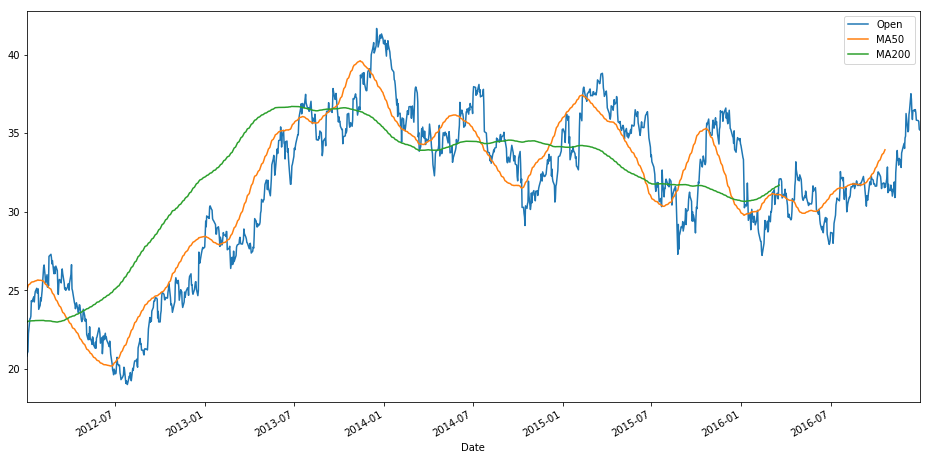

In [8]:
# Choose interested plot

plottype = str(input("Enter the number of the plot you want:\n 1. Plot Fisrt Stock Open Price\n 2. Plot Second Stock Open Price\n 3. Plot Third Stock Open Price\n 4. Plot Fisrt Stock Volume\n 5. Plot Second Stock Volume\n 6. Plot Third Stock Volume\n 7. Plot First Stock Total Traded\n 8. Plot Second Stock Total Traded\n 9. Plot Third Stock Total Traded\n 10. Plot First Stock Moving Averages\n 11. Plot Second Stock Moving Averages\n 12. Plot Third Stock Moving Averages\n 13. Plot 3 Stock Open Price together\n 14. Plot 3 Stock Volume together\n 15. Plot 3 Stock TotalTraded together\n 16. Plot 3 Stock Scatter Matrix\n"))


if plottype == '1':
    
    Plot.plotOpen(stock1)
    
elif plottype == '2':
    
    Plot.plotOpen(stock2)

elif plottype == '3':
    
    Plot.plotOpen(stock3)
    
elif plottype == '4':
    
    Plot.plotVolume(stock1)

elif plottype == '5':
    
    Plot.plotVolume(stock2)
    
elif plottype == '6':
    
    Plot.plotVolume(stock3)  
    
elif plottype == '7':
    
    Plot.plotTotalTraded(stock1)  
    
elif plottype == '8':
    
    Plot.plotTotalTraded(stock2)     
 
elif plottype == '9':
    
    Plot.plotTotalTraded(stock3) 
       
elif plottype == '10':
    
    Plot.plotMovingAverages(stock1)  
    
elif plottype == '11':
    
    Plot.plotMovingAverages(stock2)     
 
elif plottype == '12':
    
    Plot.plotMovingAverages(stock3) 
    
elif plottype == '13':
    
    Plot3Stock.plotOpen(stock1, stock2, stock3)     
    
elif plottype == '14':
    
    Plot3Stock.plotVolume(stock1, stock2, stock3) 
    
elif plottype == '15':
    
    Plot3Stock.plotTotalTraded(stock1, stock2, stock3) 
    
elif plottype == '16':
    
    Plot3Stock.plotScatterMatrix(stock1, stock2, stock3)   
    
else:
    
    print('Please enter the number between 1~16.')
    

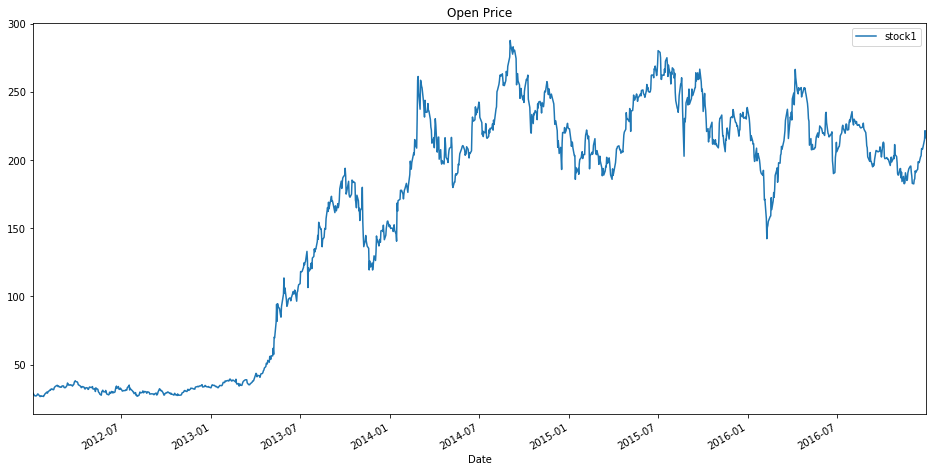

In [51]:
Plot.plotOpen(stock1)

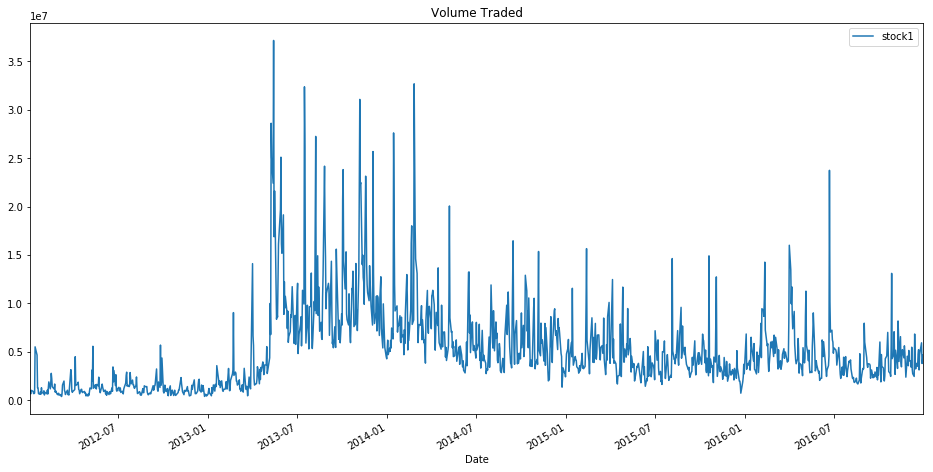

In [52]:
Plot.plotVolume(stock1)

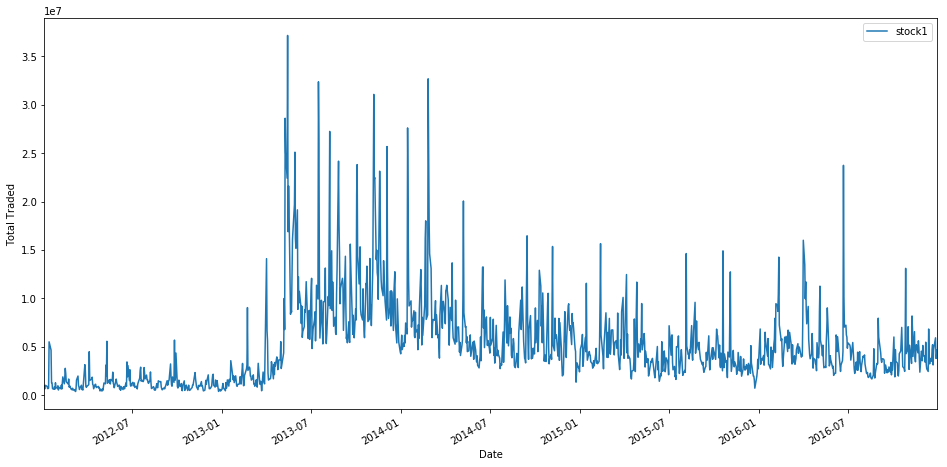

In [53]:
Plot.plotTotalTraded(stock1)

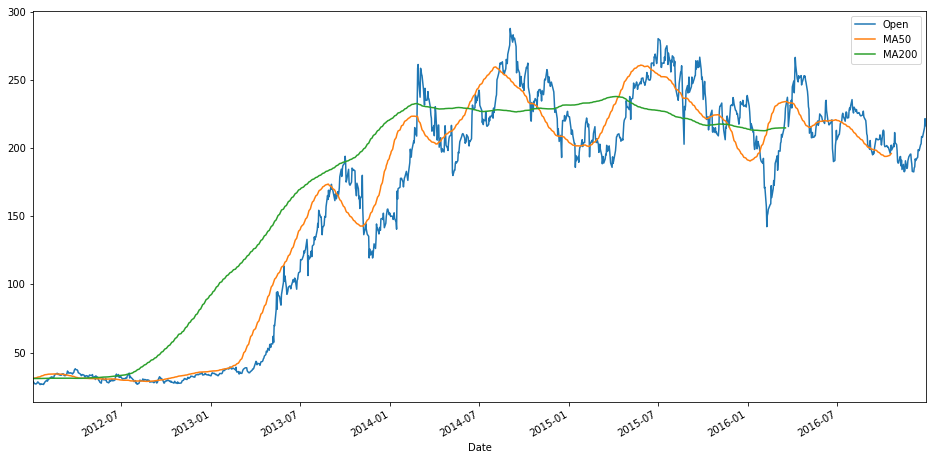

In [54]:
Plot.plotMovingAverages(stock1)

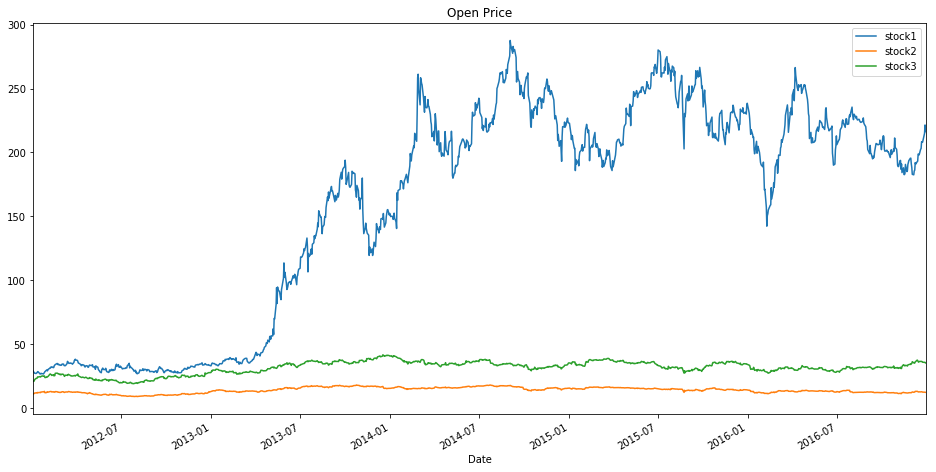

In [55]:
Plot3Stock.plotOpen(stock1, stock2, stock3) 

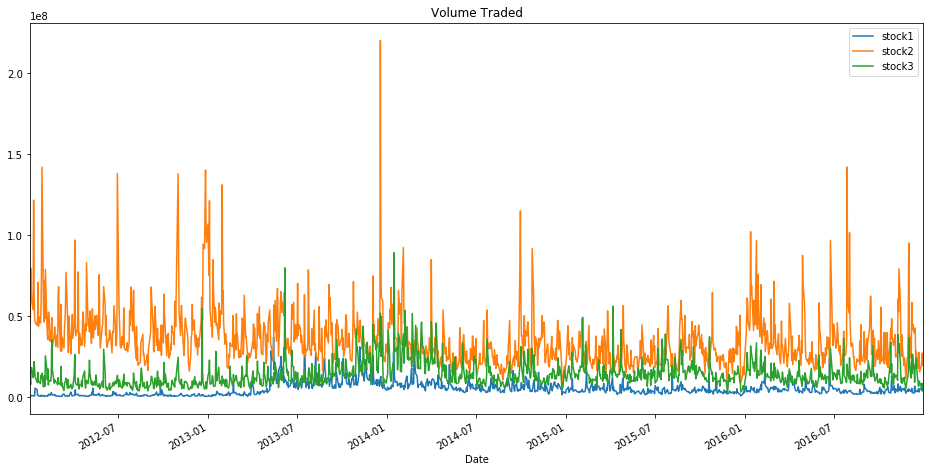

In [56]:
Plot3Stock.plotVolume(stock1, stock2, stock3) 

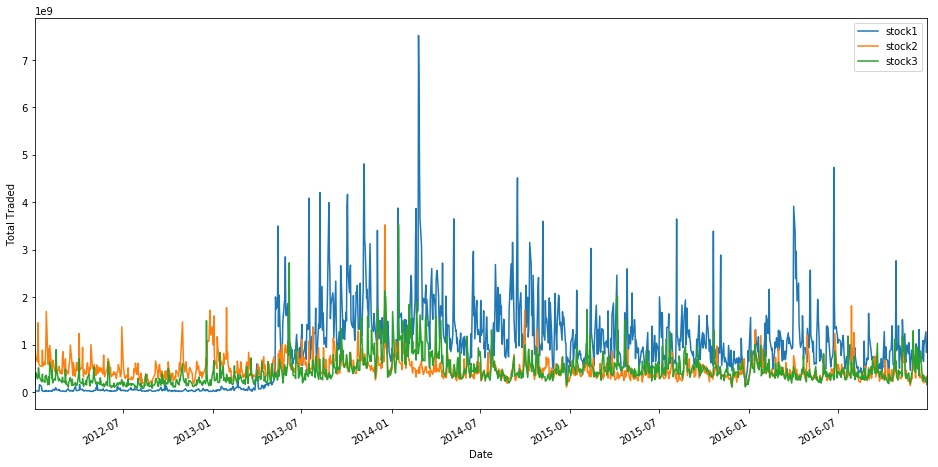

In [59]:
Plot3Stock.plotTotalTraded(stock1, stock2, stock3) 

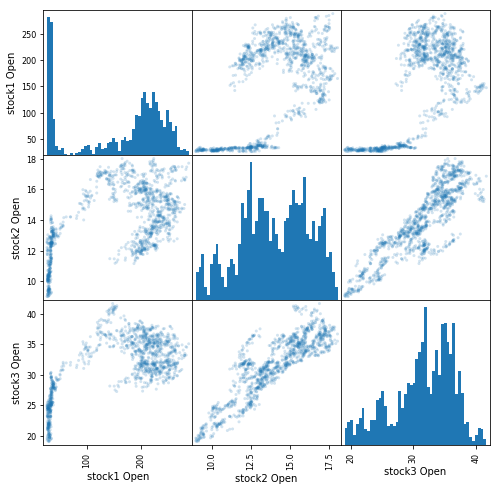

In [64]:
Plot3Stock.plotScatterMatrix(stock1, stock2, stock3)

### Part 3: Basic Financial Analysis
**Daily Percentage Change & Cumulative Daily Returns**

In [109]:
class Analyze:
    
    def __init__(self, stock1):
        
        self.stock1 = stock1
        
   

    def dailyPercentageChangeHist(stock1):
        '''Plot the daily Percentage Change Histogram of one stock'''
        
        stock1['returns'] = (stock1['Close'] / stock1['Close'].shift(1) ) - 1
        
        stock1['returns'].hist(bins=50)
        
    
    def dailyPercentageChangeBox(stock1):
        '''Plot the daily Percentage Change Box of one stock'''
        
        stock1['returns'] = (stock1['Close'] / stock1['Close'].shift(1) ) - 1
        
        stock1['returns'].plot(kind='box',figsize=(5,11),colormap='jet')
        

        
    def cumulativeReturn(stock1):
        '''Plot the Cumulative Return of one stock'''
        
        stock1['returns'] = (stock1['Close'] / stock1['Close'].shift(1) ) - 1
        stock1['Cumulative Return'] = (1 + stock1['returns']).cumprod()
    
        stock1['Cumulative Return'].plot(label='stock1',figsize=(16,8),title='Cumulative Return')
        plt.legend()
    

In [110]:
class Analyze3Stock(Analyze):
    
    def __init__(self, stock1, stock2, stock3):
        
        Analyze.__init__(self, stock1)
        self.stock2 = stock2
        self.stock3 = stock3
        
   

    def dailyPercentageChangeHist(stock1, stock2, stock3):
        '''Plot the daily Percentage Change Histogram of three stock'''
        
        stock1['returns'] = (stock1['Close'] / stock1['Close'].shift(1) ) - 1
        stock2['returns'] = (stock2['Close'] / stock2['Close'].shift(1) ) - 1
        stock3['returns'] = (stock3['Close'] / stock3['Close'].shift(1) ) - 1
        
        stock1['returns'].hist(bins=100,label='stock1',figsize=(10,8),alpha=0.5)
        stock2['returns'].hist(bins=100,label='stock2',alpha=0.5)
        stock3['returns'].hist(bins=100,label='stock3',alpha=0.5)
        plt.legend()

        
        
    def dailyPercentageChangeBox(stock1, stock2, stock3):
        '''Plot the daily Percentage Change Boxplot of three stock'''
        
        stock1['returns'] = (stock1['Close'] / stock1['Close'].shift(1) ) - 1
        stock2['returns'] = (stock2['Close'] / stock2['Close'].shift(1) ) - 1
        stock3['returns'] = (stock3['Close'] / stock3['Close'].shift(1) ) - 1
                
            
        stock_box = pd.concat([stock1['returns'],stock2['returns'],stock3['returns']],axis=1)
        stock_box.columns = ['stock1 Returns',' stock2 Returns','stock3 Returns']
        stock_box.plot(kind='box',figsize=(8,11),colormap='jet')
    
    
    def dailyPercentageChangeScatterMatrix(stock1, stock2, stock3):
        '''Plot the Daily Percentage Change Scatter Matrix of three stock'''
        
        stock1['returns'] = (stock1['Close'] / stock1['Close'].shift(1) ) - 1
        stock2['returns'] = (stock2['Close'] / stock2['Close'].shift(1) ) - 1
        stock3['returns'] = (stock3['Close'] / stock3['Close'].shift(1) ) - 1
                
            
        stock = pd.concat([stock1['returns'],stock2['returns'],stock3['returns']],axis=1)
        stock.columns = ['stock1 Returns',' stock2 Returns','stock3 Returns']
        scatter_matrix(stock,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})
      
    
    
    def cumulativeReturn(stock1, stock2, stock3):
        ''''Plot the Cumulative Return of three stock'''
        
    
        stock1['returns'] = (stock1['Close'] / stock1['Close'].shift(1) ) - 1
        stock2['returns'] = (stock2['Close'] / stock2['Close'].shift(1) ) - 1
        stock3['returns'] = (stock3['Close'] / stock3['Close'].shift(1) ) - 1        
        
        stock1['Cumulative Return'] = (1 + stock1['returns']).cumprod()
        stock2['Cumulative Return'] = (1 + stock2['returns']).cumprod()
        stock3['Cumulative Return'] = (1 + stock3['returns']).cumprod()
    
        stock1['Cumulative Return'].plot(label='stock1',figsize=(16,8),title='Cumulative Return')
        stock2['Cumulative Return'].plot(label='stock2')
        stock3['Cumulative Return'].plot(label='stock3')
        plt.legend()    

Enter the number of the plot you want:
 1. Plot Fisrt Stock Daily Percentage Change Histogram
 2. Plot Second Stock Daily Percentage Change Histogram
 3. Plot Third Stock Daily Percentage Change Histogram
 4. Plot Fisrt Stock Daily Percentage Change Boxplot
 5. Plot Second Stock Daily Percentage Change Boxplot
 6. Plot Third Stock Daily Percentage Change Boxplot
 7. Plot First Stock Cumulative Return
 8. Plot Second Stock Cumulative Return
 9. Plot Third Stock Cumulative Return
 10. Plot 3 Stock Daily Percentage Change Histogram together
 11. Plot 3 Stock Daily Percentage Change Boxplot together
 12. Plot 3 Stock Daily Percentage Change Scatter Matrix
 13. Plot 3 Cumulative Return together
13


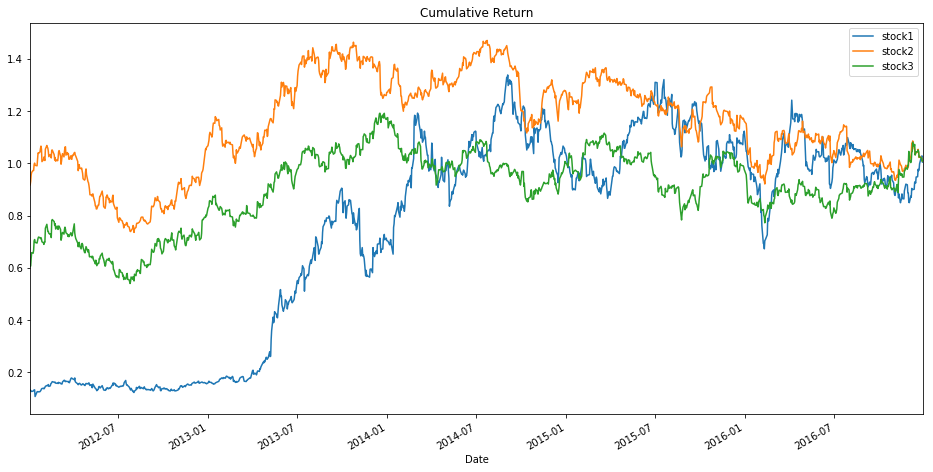

In [124]:
# Choose interested analysis
plottype = str(input("Enter the number of the plot you want:\n 1. Plot Fisrt Stock Daily Percentage Change Histogram\n 2. Plot Second Stock Daily Percentage Change Histogram\n 3. Plot Third Stock Daily Percentage Change Histogram\n 4. Plot Fisrt Stock Daily Percentage Change Boxplot\n 5. Plot Second Stock Daily Percentage Change Boxplot\n 6. Plot Third Stock Daily Percentage Change Boxplot\n 7. Plot First Stock Cumulative Return\n 8. Plot Second Stock Cumulative Return\n 9. Plot Third Stock Cumulative Return\n 10. Plot 3 Stock Daily Percentage Change Histogram together\n 11. Plot 3 Stock Daily Percentage Change Boxplot together\n 12. Plot 3 Stock Daily Percentage Change Scatter Matrix\n 13. Plot 3 Cumulative Return together\n"))


if plottype == '1':
    
    Analyze.dailyPercentageChangeHist(stock1)
    
elif plottype == '2':
    
    Analyze.dailyPercentageChangeHist(stock2)

elif plottype == '3':
    
    Analyze.dailyPercentageChangeHist(stock3)
    
elif plottype == '4':
    
    Analyze.dailyPercentageChangeBox(stock1)

elif plottype == '5':
    
    Analyze.dailyPercentageChangeBox(stock2)
    
elif plottype == '6':
    
    Analyze.dailyPercentageChangeBox(stock3)
    
elif plottype == '7':
    
    Analyze.cumulativeReturn(stock1)
    
elif plottype == '8':
    
    Analyze.cumulativeReturn(stock2)
 
elif plottype == '9':
    
    Analyze.cumulativeReturn(stock3)
       
elif plottype == '10':
    
    Analyze3Stock.dailyPercentageChangeHist(stock1, stock2, stock3)  
    
elif plottype == '11':
    
    Analyze3Stock.dailyPercentageChangeBox(stock1, stock2, stock3)       
 
elif plottype == '12':
    
    Analyze3Stock.dailyPercentageChangeScatterMatrix(stock1, stock2, stock3) 
    
elif plottype == '13':
    
    Analyze3Stock.cumulativeReturn(stock1, stock2, stock3)
    
else:
    
    print('Please enter the number between 1~13.')
    

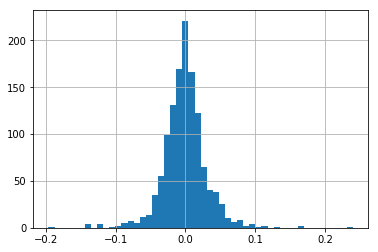

In [67]:
Analyze.dailyPercentageChangeHist(stock1)

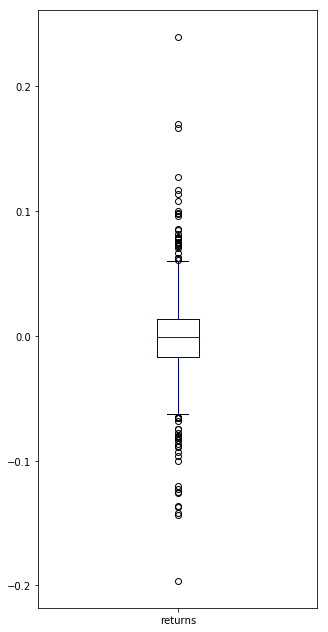

In [68]:
Analyze.dailyPercentageChangeBox(stock1)

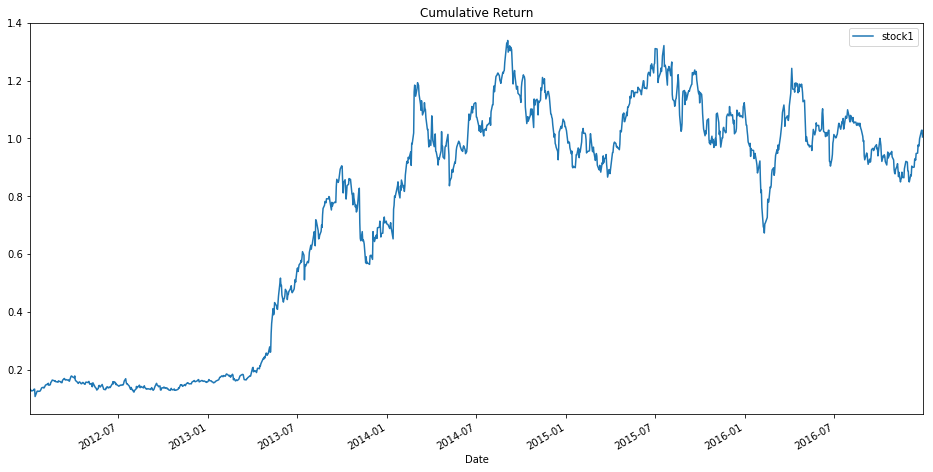

In [69]:
Analyze.cumulativeReturn(stock1)

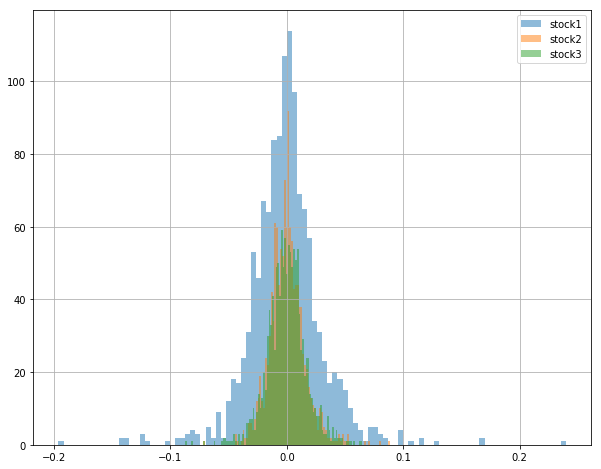

In [70]:
Analyze3Stock.dailyPercentageChangeHist(stock1, stock2, stock3)

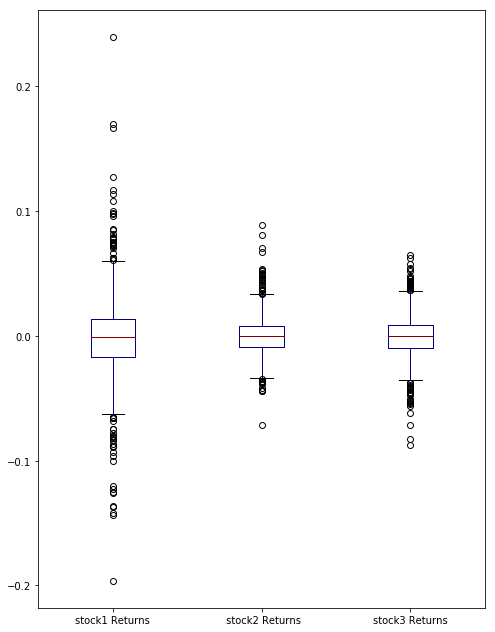

In [71]:
Analyze3Stock.dailyPercentageChangeBox(stock1, stock2, stock3)

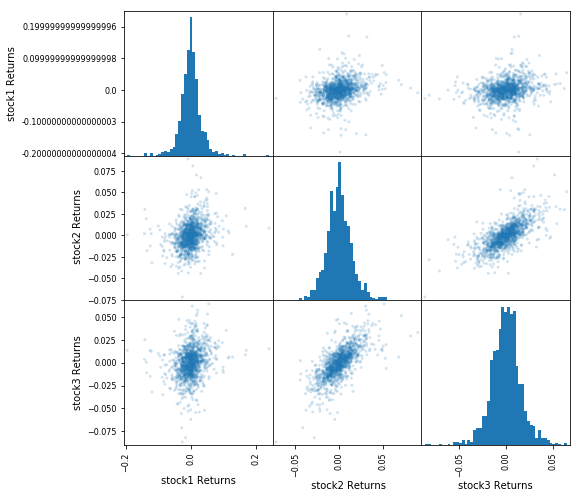

In [72]:
Analyze3Stock.dailyPercentageChangeScatterMatrix(stock1, stock2, stock3)

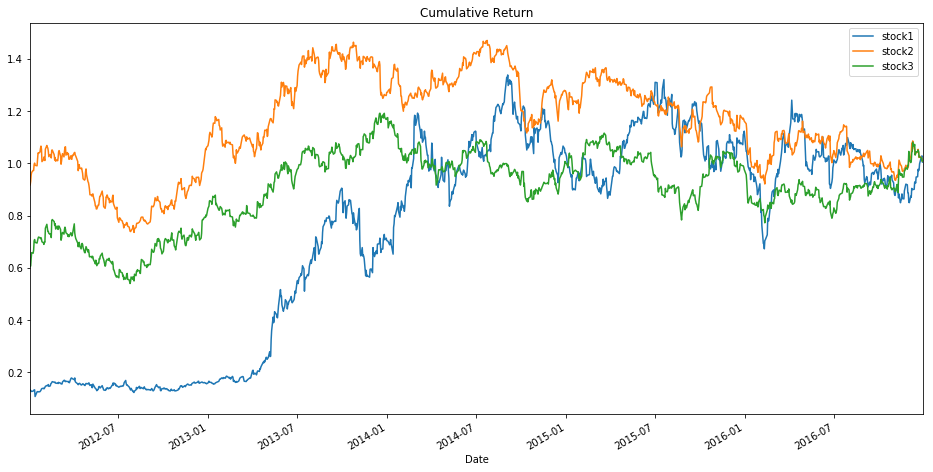

In [73]:
Analyze3Stock.cumulativeReturn(stock1, stock2, stock3)